In [76]:
from fastai.vision.all import get_image_files, ImageDataLoaders, Resize, vision_learner, resnet34, error_rate
from pathlib import Path
import numpy;
import matplotlib.pyplot as plt;

In [77]:
files = get_image_files("images")
len(files)

1316

In [78]:
files[0], files[300], files[1000]

(Path('images/algae/algae001.jpg'),
 Path('images/blue_mussel/blue_mussel076.JPG'),
 Path('images/rock_oysters/rock_oysters076.jpg'))

In [79]:
def label_func(f: Path) -> str:
    s = f.as_posix()
    start = s.index('/')+1
    end = s.index('/', start)
    return s[start:end]

In [80]:
label_func(files[0]), label_func(files[300]), label_func(files[1000])


('algae', 'blue_mussel', 'rock_oysters')

In [81]:
dls = ImageDataLoaders.from_path_func(".",files, label_func, item_tfms=Resize(256), num_workers=0)

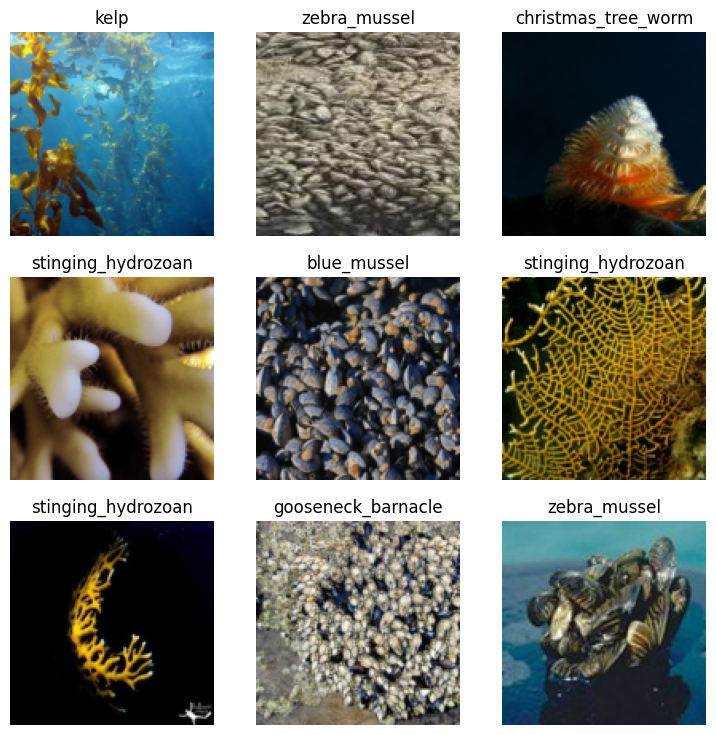

In [82]:
dls.show_batch()

In [83]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

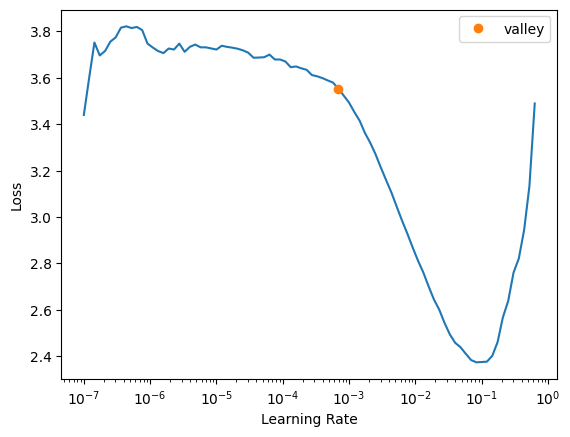

In [84]:
x = learn.lr_find()

In [86]:
x

SuggestedLRs(valley=0.0006918309954926372)

In [87]:
learn.fine_tune(10,0.00069)

epoch     train_loss  valid_loss  error_rate  time    
0         3.356544    1.784340    0.600760    00:33                                      
epoch     train_loss  valid_loss  error_rate  time    
0         2.414091    1.517010    0.524715    00:42                                       
1         2.130987    1.136387    0.387833    00:42                                       
2         1.722907    0.854750    0.277567    00:42                                       
3         1.405721    0.719000    0.258555    00:42                                       
4         1.140414    0.653298    0.224335    00:42                                       
5         0.916373    0.632813    0.220532    00:43                                       
6         0.749954    0.602219    0.205323    00:45                                       
7         0.628203    0.585161    0.197719    00:42                                       
8         0.533010    0.586414    0.197719    00:42                     

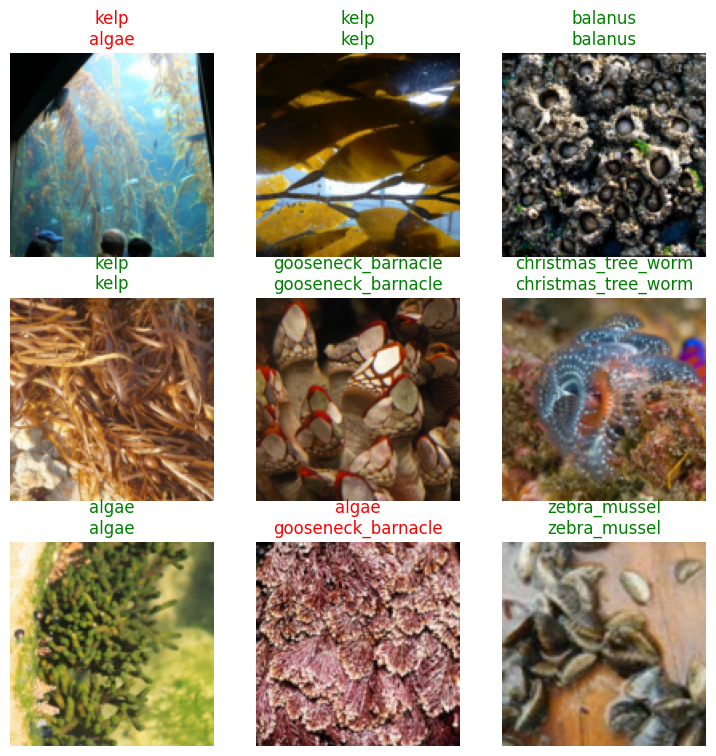

In [88]:
learn.show_results()